<a href="https://colab.research.google.com/github/fleshgordo/dataexploration/blob/main/DataExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data exploration with pandas

# Introduction to Pandas in Python

Pandas is a powerful and flexible Python library used for data manipulation and analysis. This handbook is designed to help you understand and master the fundamental concepts and operations of Pandas, making your data analysis tasks more efficient and insightful. And hopefully more fun.

## What Will You Learn?

- **Basics of Pandas**: Understand the core structures of Pandas.
- **Data Manipulation**: Learn how to manipulate data in DataFrames including sorting, filtering, and aggregating data.
- **Data Cleaning**: Techniques to handle missing data, remove duplicates, and fix data inconsistencies.
- **Data visualisation** *italicised text*: Introduction to plotting with Pandas and its integration with Matplotlib for visual data analysis.

I use pandas very often for quick and efficient analysis, not per se for visualisation since you can quickly reach its limits in terms of aesthetics. Nonetheless, it's great (plus really fast) for [data-crunching](https://www.netsuite.com/portal/resource/articles/erp/data-crunching.shtml). Once you did your analysis, you can export a clean CSV file which you can use later on.  

## Basics

Python is a versatile programming language that's great for handling data. While basic data structures like lists and dictionaries are useful, pandas provides a more powerful way to work with structured data.

In [5]:
# A simple list in Python
data = [1, 2, 3, 4, 5]
print(data)
print(f"First entry is: {data[0]}")

[1, 2, 3, 4, 5]
First entry is: 1


### Importing pandas
First, we need to import the pandas library to get started.

In [ ]:
import pandas as pd

### Creating a Sample Dataset

We'll work with a simple dataset of six students, including their names, ages, and grades.

In [7]:
# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank'],
    'Age': [20, 22, 19, 21, 22, 30],
    'Grade': [88, 92, 85, 95, 92, 87]
}

# Create a DataFrame
df = pd.DataFrame(data)

Let's view the DataFrame:

In [ ]:
df

,Name,Age,Grade
0,Alice,20,88
1,Bob,22,92
2,Charlie,19,85
3,David,21,95
4,Eva,20,90
5,Frank,90,87


Exploring the Data

In [ ]:
# Display the first five rows
df.head()

,Name,Age,Grade
0,Alice,20,88
1,Bob,22,92
2,Charlie,19,85
3,David,21,95
4,Eva,20,90


Understanding the DataFrame Structure

In [ ]:
# Get a summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Name    6 non-null      object
 1   Age     6 non-null      int64 
 2   Grade   6 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 272.0+ bytes


Descriptive Statistics

In [ ]:
# Get statistical summary
df.describe()

,Age,Grade
count,6.000000,6.000000
mean,32.000000,89.500000
std,28.432376,3.619392
min,19.000000,85.000000
25%,20.000000,87.250000
50%,20.500000,89.000000
75%,21.750000,91.500000
max,90.000000,95.000000


In [ ]:
# get the average values for the dataframe
df.mean(numeric_only=True)

,0
Age,32.0
Grade,89.5


Show only one column of the data series

In [ ]:
df["Age"]

,Age
0,20.0
1,22.0
2,19.0
3,21.0
5,30.0


### Data cleaning

Checking for Missing Values

In [ ]:
# Check for missing values
df.isnull().sum()

,0
Name,0
Age,0
Grade,0


Since our dataset is (still ;)) clean, there are no missing values. If there were, we could handle them using:

In [ ]:
# Drop rows with missing values (if any)
df.dropna(inplace=True)

Checking for Duplicates

In [6]:
# Check for duplicate rows
df.duplicated().sum()

NameError: name 'df' is not defined

If you have duplicates you could again delete them via:

In [ ]:
# Drop duplicate rows (if any)
df.drop_duplicates(inplace=True)

### Data Type Conversion

Sometimes you want to make sure that data types are appropriate. This can help to fix problems at later stage with data analysis. In many case, pandas will assign the correct data type while importing but sometimes you have to do it by hand. And in most cases, you don't really have to think about it. *italicised text*

In [ ]:
# Check data types
df.dtypes

,0
Name,object
Age,int64
Grade,int64


In [ ]:
# convert the Name to a string type
df["Age"] = df['Age'].astype(float)
df

,Name,Age,Grade
0,Alice,20.0,88
1,Bob,22.0,92
2,Charlie,19.0,85
3,David,21.0,95
5,Frank,30.0,87


### Data Filtering and Modification

#### Filtering Data
Select students who scored above 90.

In [ ]:
# Filter students with grades above 90
high_achievers = df[df['Grade'] > 90]
high_achievers

,Name,Age,Grade
1,Bob,22,92
3,David,21,95
4,Eva,22,92


Sorting is quite easy to achieve.

In [ ]:
# Sort the DataFrame by Age
df_sorted = df.sort_values('Age')
#df_sorted = df.sort_values('Name')
#df_sorted = df.sort_values('Grade',ascending=False)

df_sorted

,Name,Age,Grade,Grade Category
2,Charlie,19,90,B
0,Alice,20,93,B
3,David,21,100,A
1,Bob,22,97,A
4,Eva,22,97,A
5,Frank,30,92,B


#### Adding a New Column
Create a new column to categorize grades.

In [28]:
# Define a function to categorize grades
def grade_category(grade):
    if grade >= 90:
        return 'A'
    elif grade >= 80:
        return 'B'
    else:
        return 'C'

# Apply the function to create a new column
df['Grade Category'] = df['Grade'].apply(grade_category)
df

,Name,Age,Grade,Grade Category
0,Alice,20,88,B
1,Bob,22,90,A
2,Charlie,19,85,B
3,David,21,90,A
4,Eva,22,90,A
5,Frank,30,87,B


### Updating Existing Data

Students want better grades, right? Everyone's grade increases by 5 points. How can we achieve that?

In [11]:
# Increase all grades by 5
df['Grade'] = df['Grade'] + 5
df

,Name,Age,Grade
0,Alice,20,88
1,Bob,22,90
2,Charlie,19,85
3,David,21,90
4,Eva,22,90
5,Frank,30,87


We should avoid grades exceed the 100, right?

In [10]:
# Ensure grades do not exceed 100
df['Grade'] = df['Grade'].apply(lambda x: 100 if x > 100 else x)
df

,Name,Age,Grade
0,Alice,20,98
1,Bob,22,100
2,Charlie,19,95
3,David,21,100
4,Eva,22,100
5,Frank,30,97


### Exporting Data

Save the modified DataFrame to a new CSV file

In [12]:
# Export DataFrame to CSV (in colab have a look for newly created file csv)
df.to_csv('students_modified.csv', index=False)

# we use index=False to ignore the index that came along with pandas

### Importing Data

CSV or JSON files can be imported quite easily

In [14]:
df = pd.read_csv('students_modified.csv')
df

,Name,Age,Grade
0,Alice,20,88
1,Bob,22,90
2,Charlie,19,85
3,David,21,90
4,Eva,22,90
5,Frank,30,87


## Visualisations

Python has various plotting libraries. Most basic and famous one is matplotlib. First, as usual, let's import it:

In [16]:
import matplotlib.pyplot as plt

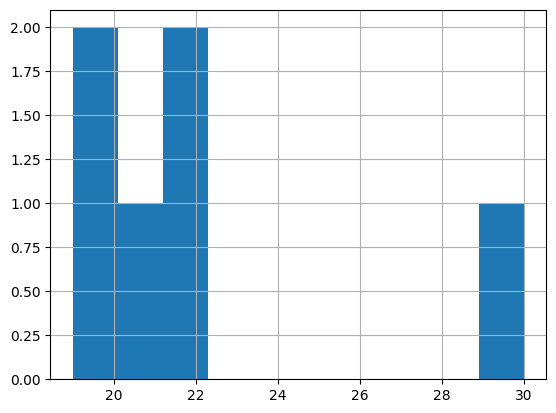

In [17]:
# Plot a histogram of student ages
df['Age'].hist()
plt.show()

If you want to give labels and a title, there are several plt functions available (more info [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel))

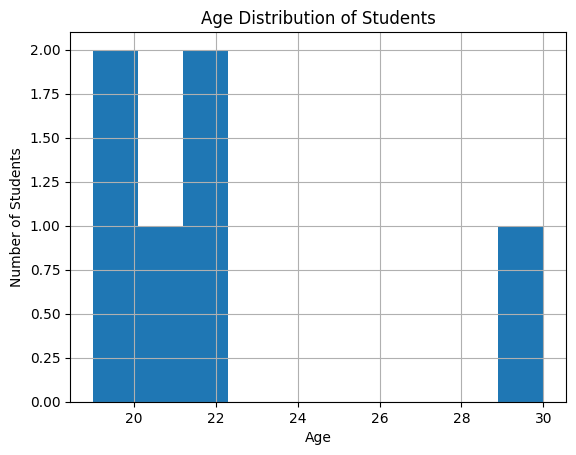

In [ ]:
# Plot a histogram of student ages
df['Age'].hist()
plt.title('Age Distribution of Students')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.show()

### Understanding the plt Object
The plt object acts as a convenient interface for creating and customising plots. Here's why we can use methods like hist, bar, etc.:

* **plt.hist()**: Creates a histogram, which is useful for showing the distribution of a dataset.
* **plt.bar()**: Generates a bar chart, ideal for comparing quantities across different categories.
* **plt.plot()**: Plots data as lines and/or markers, commonly used for line graphs.
* **plt.scatter()**: Creates a scatter plot, displaying values for typically two variables for a set of data.
* **plt.pie()**: Generates a pie chart, representing data in terms of proportions.

These functions internally manage the creation of figures, axes, and plots, allowing us to focus on the data visualisation rather than the underlying mechanics.

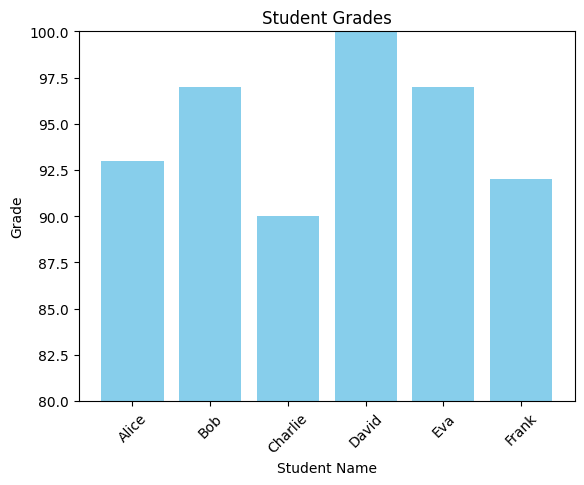

In [ ]:
# Plot a bar chart of student grades
plt.bar(df['Name'], df['Grade'], color='skyblue')
plt.title('Student Grades')
plt.xlabel('Student Name')
plt.ylabel('Grade')
plt.xticks(rotation=45)
plt.ylim(80, 100)  # Set y-axis limits for better visualisation
plt.show()

### Scatter plot

A scatter plot is useful for visualizing the relationship between two numerical variables. `plt.scatter()` plots individual data points.

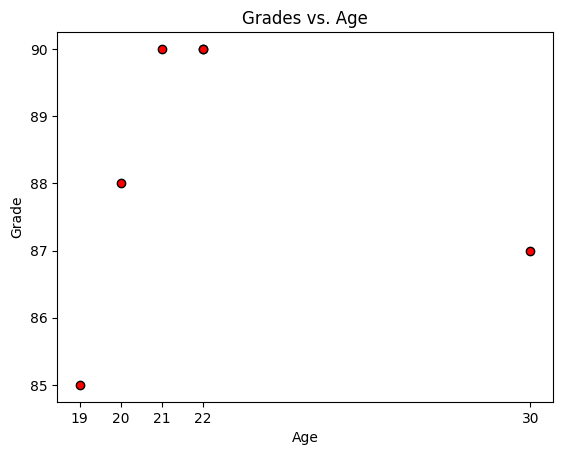

In [22]:
# Plot a scatter plot of grades vs. age
plt.scatter(df['Age'], df['Grade'], color='red', edgecolor='black')
plt.title('Grades vs. Age')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.xticks(df['Age'].unique())
plt.show()

### Saving plot

You can save your plots to image files using `plt.savefig()`:

In [24]:
# Save the last plot as a PNG file
plt.savefig('grades_vs_age.png',dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>

In case your png file is blank white,make sure you call savefig before the show() function:

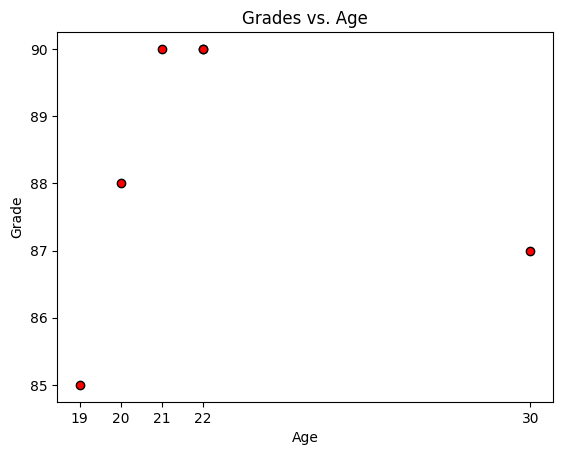

In [25]:
# Plot a scatter plot of grades vs. age
plt.scatter(df['Age'], df['Grade'], color='red', edgecolor='black')
plt.title('Grades vs. Age')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.xticks(df['Age'].unique())
plt.savefig('grades_vs_age.png')
plt.show()

### Other librarires


#### Plotly

Plotly is a graphing library that makes interactive, publication-quality graphs. It supports interactive plotting in Jupyter notebooks.

In [31]:
import plotly.express as px

# Interactive scatter plot
fig = px.scatter(df, x='Age', y='Grade', color='Grade Category',
                 title='Grades vs. Age by Grade Category',
                 labels={'Grade': 'Grade', 'Age': 'Age'},
                 hover_data=['Name'])
fig.show()

#### Seaborn

Seaborn is built on top of matplotlib and provides a high-level interface for creating attractive and informative statistical graphics.

In [30]:
import seaborn as sns

# Scatter plot with regression line
sns.lmplot(x='Age', y='Grade', data=df, hue='Grade Category', fit_reg=True)
plt.title('Grades vs. Age with Regression Line')
plt.show()

## Exercises

### Exercise 1
Modify the dataset. Imagine what kind of analyis could be done with the dataset? Prepare first questions you want to "ask" to the dataset. Then try prompting to modify the `df`object by filtering, sorting, other analysis. Once you are fine, you can also extend your dataset by downloading a bigger student dataset (see section fake data)


### Exercise 2 (individual)

Try loading another CSV files from previous workshops. Can you load it into pandas? Can you batch modify values and visualise them?

## Fake data

We can quickly generata a synthetic dataset for testing purposes. Make sure you imported the necessary libraries:

In [32]:
import pandas as pd
import numpy as np
import random

# Optional: Install and import faker for realistic names
!pip install faker
from faker import Faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 20.8 MB/s eta 0:00:00


The faker library is helpful in creating "fake" real data. First, initialise it:

In [33]:
fake = Faker()

Then, let's generate data in a loop

In [35]:
# Lists to store the data
names = []
ages = []
grades = []

# Generate data for 100 students
for _ in range(100):
    # Generate a fake name
    name = fake.name()
    names.append(name)

    # Generate a random age between 18 and 30
    age = random.randint(18, 30)
    ages.append(age)

    # Generate a random grade between 60 and 100
    grade = random.randint(60, 100)
    grades.append(grade)

In [37]:
print(names)
print(grades)
print(ages)

['John Choi', 'Alexis Flynn', 'Jonathan Potter', 'Eric Yang', 'Jeffrey Hansen', 'Kimberly Nielsen', 'Tony Ritter', 'Dave Jones', 'Evan Henry', 'Brittany Martinez', 'Jorge Hernandez', 'John Pierce', 'Michael Williams', 'Jordan Carter', 'Madison Padilla', 'Jeremy Peterson', 'Benjamin Miller', 'Angela Ferguson', 'Christopher Ruiz', 'Michael Jimenez', 'Ashley Guerrero', 'Taylor Brown', 'James Vance', 'Kenneth Berry', 'Rachel Hampton', 'Denise Hancock DVM', 'Donna Baker', 'Amber Johnson', 'Laura Hansen', 'Zachary Yoder', 'Timothy Jones', 'Danielle Martinez', 'Ronald Hicks', 'Emily Ortega', 'Michelle Jones', 'Susan Mcneil MD', 'Robert Simmons', 'Janice Hamilton', 'James Pratt', 'Jennifer Dillon', 'Elizabeth Richardson MD', 'Kimberly Kelley', 'Michael Myers', 'Jennifer Johnson', 'Tammy Rios', 'Adam Jackson', 'Tiffany Christian', 'Dominique Douglas', 'Raymond Day', 'Monica Bishop', 'Frederick Patterson', 'Lisa Christian', 'Keith Hicks', 'Erik Mann', 'Susan Hernandez', 'Mary Wallace', 'Samuel W

Create a dataframe with pandas by passing the newly generated lists:

In [42]:
# Create a dictionary with the data
data = {
    'Name': names,
    'Age': ages,
    'Grade': grades
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the first few rows
df.head()

,Name,Age,Grade
0,John Choi,22,74
1,Alexis Flynn,21,79
2,Jonathan Potter,29,70
3,Eric Yang,22,61
4,Jeffrey Hansen,18,77


In [43]:
# show dataframe
df

,Name,Age,Grade
0,John Choi,22,74
1,Alexis Flynn,21,79
2,Jonathan Potter,29,70
3,Eric Yang,22,61
4,Jeffrey Hansen,18,77
...,...,...,...
95,David Miller,30,87
96,Holly Carey,26,100
97,Anne Edwards,26,70
98,Mary Vasquez,19,64


# OECD data

### Getting the data

Before we start we need to download the CSV files into our temporary drive. By executing following line you'll download all csv files

In [70]:
!wget -O example.zip "https://drive.switch.ch/index.php/s/JeNWvdjnqn7BoHR/download"

--2024-09-18 15:26:03--  https://drive.switch.ch/index.php/s/JeNWvdjnqn7BoHR/download
Resolving drive.switch.ch (drive.switch.ch)... 86.119.34.138, 86.119.34.137, 2001:620:5ca1:1ee::11, ...
Connecting to drive.switch.ch (drive.switch.ch)|86.119.34.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16881 (16K) [application/zip]
Saving to: ‘example.zip’

example.zip         100%[===================>]  16.49K  --.-KB/s    in 0s      

2024-09-18 15:26:04 (133 MB/s) - ‘example.zip’ saved [16881/16881]



In [72]:
!unzip "example.zip"
#!head example.zip

Archive:  example.zip
  inflating: dimensions_labels.csv   
  inflating: __MACOSX/._dimensions_labels.csv  
  inflating: dimensions_scores_historic.csv  
  inflating: __MACOSX/._dimensions_scores_historic.csv  
  inflating: dimensions_scores.csv   
  inflating: __MACOSX/._dimensions_scores.csv  
  inflating: economies_labels.csv    
  inflating: __MACOSX/._economies_labels.csv  
  inflating: indicators_labels.csv   
  inflating: __MACOSX/._indicators_labels.csv  
  inflating: indicators_scores.csv   
  inflating: __MACOSX/._indicators_scores.csv  
  inflating: structure.csv           
  inflating: __MACOSX/._structure.csv  
  inflating: subdimensions_labels.csv  
  inflating: __MACOSX/._subdimensions_labels.csv  
  inflating: subdimensions_scores.csv  
  inflating: __MACOSX/._subdimensions_scores.csv  


Explanation:

`!` allows you to run shell commands in Colab notebooks.

`!wget` downloads the file at the provided path.

`-O example.zip` specifies the output filename as example.zip.

with `!unzip` we extract the zip file immediately after download.

In [73]:
import pandas as pd
df = pd.read_csv('/content/dimensions_scores_historic.csv')

One of the core data structures in pandas is the DataFrame, which can be thought of as a table of data, with rows and columns.

A **DataFrame** is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure with labeled axes (rows and columns). It is similar to a SQL table or an Excel spreadsheet. We store the dataframe in a variable called `df`


In [74]:
df

,key,economy,year,score
0,INVESTMENT,ALB,2018,2.60
1,INVESTMENT,ALB,2021,3.10
2,INVESTMENT,ALB,2024,3.63
3,INVESTMENT,BIH,2018,2.10
4,INVESTMENT,BIH,2021,2.70
...,...,...,...,...
310,TOURISM,SRB,2021,2.30
311,TOURISM,SRB,2024,2.80
312,TOURISM,WB6_AVG,2018,1.70
313,TOURISM,WB6_AVG,2021,2.00


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315 entries, 0 to 314
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      315 non-null    object 
 1   economy  315 non-null    object 
 2   year     315 non-null    int64  
 3   score    315 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.0+ KB


## Basic Filtering

Before visualising we might want to filter the dataframe. It contains quite a lot of data. Let's focus on a specific year (2024) and a specific economy (choose one).

Below we will output the dataframe and then click on the interactive chart icon (little pocket calculator on right side next to the table)

In [109]:
df

,key,economy,year,score
0,INVESTMENT,ALB,2018,2.60
1,INVESTMENT,ALB,2021,3.10
2,INVESTMENT,ALB,2024,3.63
3,INVESTMENT,BIH,2018,2.10
4,INVESTMENT,BIH,2021,2.70
...,...,...,...,...
310,TOURISM,SRB,2021,2.30
311,TOURISM,SRB,2024,2.80
312,TOURISM,WB6_AVG,2018,1.70
313,TOURISM,WB6_AVG,2021,2.00


There's a filter button which let's use apply various filter options and the possibility to immediately export the filtered dataset as CSV, JSON or Markdown file.

For applying a simple filter, you'll need to use the bracket syntax:

In [111]:
# Filter the dataframe for economy 'MNE' and year 2024
df_filtered = df[(df['economy'] == 'MNE')]
df_filtered

,key,economy,year,score
9,INVESTMENT,MNE,2018,2.60
10,INVESTMENT,MNE,2021,3.20
11,INVESTMENT,MNE,2024,3.38
30,TRADE,MNE,2018,2.60
31,TRADE,MNE,2021,3.20
32,TRADE,MNE,2024,3.90
51,FINANCE,MNE,2018,2.40
52,FINANCE,MNE,2021,2.70
53,FINANCE,MNE,2024,3.00
72,TAX,MNE,2018,2.00


Let's combine two filter options by using the `&` sign:

In [119]:
# Filter the dataframe for economy 'MNE' and year 2024
df_filtered = df[(df['economy'] == 'MNE') & (df['year'] == 2024)]

# Be careful with data types 2024 != "2024"
#df_filtered = df[(df['economy'] == 'MNE') & (df['year'] == "2024")]

# Three filters all at once
#df_filtered = df[(df['economy'] == 'MNE') & (df['year'] == 2024) & (df['key'] == "TRADE")]

# Combine any ...
#df_filtered = df[(df['key'] == "TRADE")]

df_filtered

,key,economy,year,score
11,INVESTMENT,MNE,2024,3.38
32,TRADE,MNE,2024,3.90
53,FINANCE,MNE,2024,3.00
74,TAX,MNE,2024,2.98
95,ENTERPRISE,MNE,2024,2.50
116,ANTI_CORRUPTION,MNE,2024,2.85
137,EDUCATION,MNE,2024,3.22
158,EMPLOYMENT,MNE,2024,3.38
179,INNOVATION,MNE,2024,2.94
200,DIGITAL,MNE,2024,2.55


## Labels versus scores

Let's import labels and scores seperately

In [76]:
# Load labels
dimensions_labels = pd.read_csv('dimensions_labels.csv')
economies_labels = pd.read_csv('economies_labels.csv')
indicators_labels = pd.read_csv('indicators_labels.csv')
subdimensions_labels = pd.read_csv('subdimensions_labels.csv')

# Load scores
dimensions_scores = pd.read_csv('dimensions_scores.csv')
indicators_scores = pd.read_csv('indicators_scores.csv')
subdimensions_scores = pd.read_csv('subdimensions_scores.csv')


In [ ]:
dimensions_scores

Now we can merge the two dataframes by using the same key as identifier:

In [83]:
dimensions_merged = pd.merge(dimensions_scores, dimensions_labels, on='key', how='left')
dimensions_merged

,key,economy,year,score,label
0,INVESTMENT,ALB,2024,3.63,Investment Policy and Promotion
1,INVESTMENT,BIH,2024,2.79,Investment Policy and Promotion
2,INVESTMENT,KOS,2024,3.44,Investment Policy and Promotion
3,INVESTMENT,MNE,2024,3.38,Investment Policy and Promotion
4,INVESTMENT,MKD,2024,3.19,Investment Policy and Promotion
...,...,...,...,...,...
100,TOURISM,KOS,2024,2.26,Tourism Policy
101,TOURISM,MNE,2024,4.16,Tourism Policy
102,TOURISM,MKD,2024,1.95,Tourism Policy
103,TOURISM,SRB,2024,2.80,Tourism Policy


## Visualising



### Basics

Let's work with a small dataset to begin with. We use the filtered dataset which we've used before

In [108]:
# prompt: Using dataframe df: filter for economy alb and year 2024

# Filter the dataframe for economy 'ALB' and year 2024
df_filtered = df[(df['economy'] == 'ALB') & (df['year'] == 2024)]

# Display the filtered dataframe
df_filtered

,key,economy,year,score
2,INVESTMENT,ALB,2024,3.63
23,TRADE,ALB,2024,4.00
44,FINANCE,ALB,2024,3.00
65,TAX,ALB,2024,3.40
86,ENTERPRISE,ALB,2024,2.30
107,ANTI_CORRUPTION,ALB,2024,3.19
128,EDUCATION,ALB,2024,3.61
149,EMPLOYMENT,ALB,2024,3.46
170,INNOVATION,ALB,2024,2.39
191,DIGITAL,ALB,2024,2.73


Use a basic matplot function to create a bar-chart:

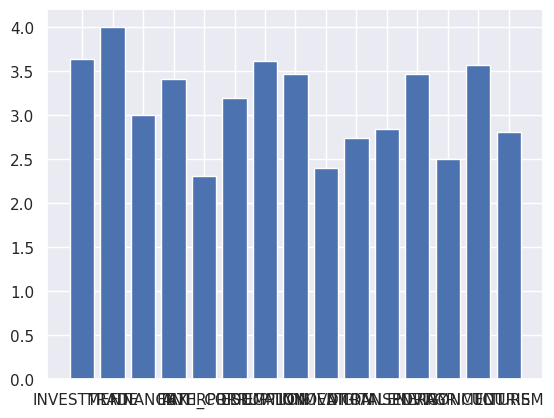

In [94]:
plt.bar(df_filtered['key'],df_filtered['score'])
plt.show()

Quite messy, let's label the axis and use other colours:

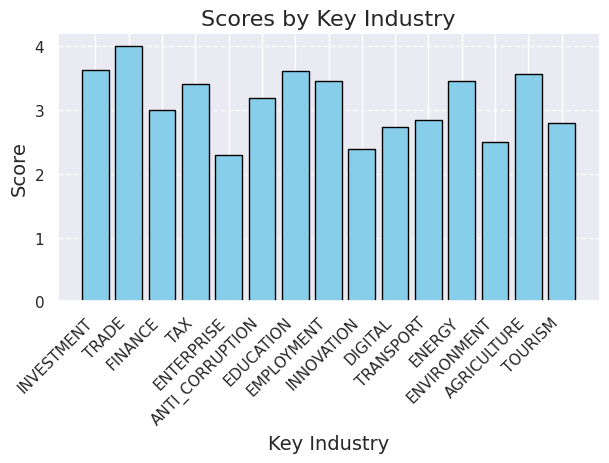

In [104]:
# Create the bar chart
plt.bar(df_filtered['key'], df_filtered['score'], color='skyblue', edgecolor='black')

# Create the scatter plot
#plt.scatter(df_filtered['key'], df_filtered['score'], color='green', s=100)

# Add titles and labels
plt.title('Scores by Key Industry', fontsize=16)
plt.xlabel('Key Industry', fontsize=14)
plt.ylabel('Score', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add gridlines (optional)
plt.grid(axis='y', linestyle='--', alpha=0.8)

# Display the plot
plt.tight_layout()


### Seaborn
For plotting more advanced graphs we need to use an additional library called seaborn. [Matplot](https://matplotlib.org/) and [seaborn](https://seaborn.pydata.org/) are popular python libraries to visualise data

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

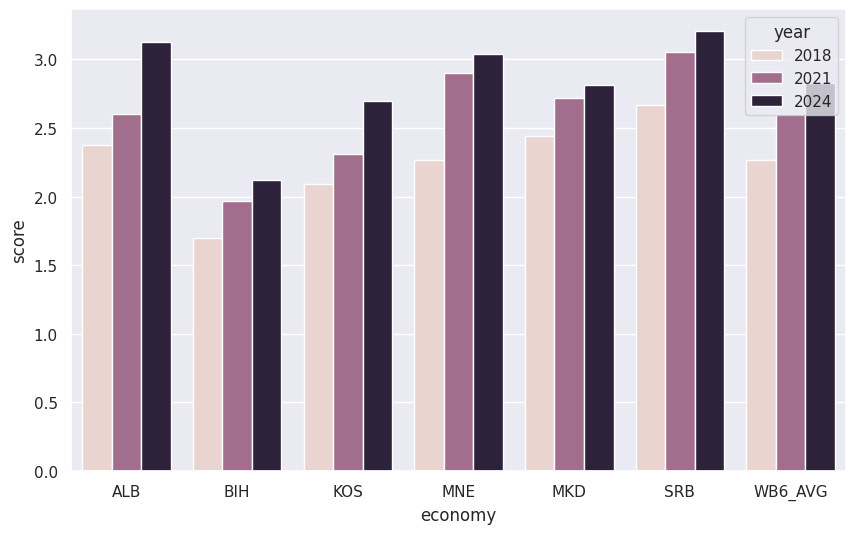

In [125]:
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='economy', y='score', hue='year', data=df, errorbar=None)

Which key is the graph above actually using? It seems the values shown don't fit any key category. The barplot function aggregates automatically the values across all key entries ("INDUSTRY", "ANTI_CORRUPTION", etc...)

If we want to visualise just one key aspect we'll filter first the df:

In [127]:
# Assume your original DataFrame is named df
key_to_plot = 'INVESTMENT'

# Filter the DataFrame for the specific key
df_filtered = df[df['key'] == key_to_plot]
df_filtered

,key,economy,year,score
0,INVESTMENT,ALB,2018,2.60
1,INVESTMENT,ALB,2021,3.10
2,INVESTMENT,ALB,2024,3.63
3,INVESTMENT,BIH,2018,2.10
4,INVESTMENT,BIH,2021,2.70
5,INVESTMENT,BIH,2024,2.79
6,INVESTMENT,KOS,2018,2.60
7,INVESTMENT,KOS,2021,2.00
8,INVESTMENT,KOS,2024,3.44
9,INVESTMENT,MNE,2018,2.60


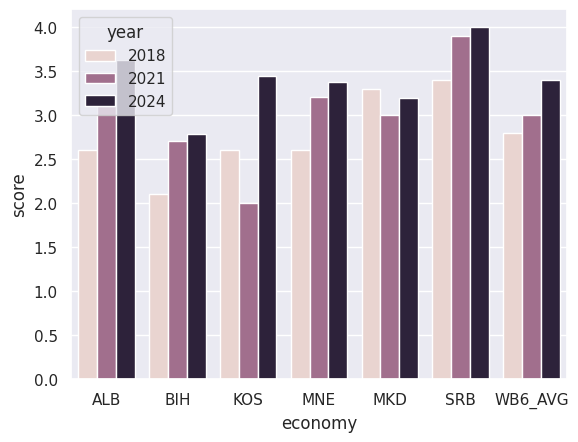

In [129]:
# Plotting a selection
bar_plot = sns.barplot(x='economy', y='score', hue='year', data=df_filtered, errorbar=None)

#### Plotting all keys into several plots

For this we need to create a loop and iterate over the individual keys. Since each row has the key, we want to make sure first, that we only the unique entries (across the 15 keys).

In [130]:
unique_keys = df['key'].unique()
unique_keys

array(['INVESTMENT', 'TRADE', 'FINANCE', 'TAX', 'ENTERPRISE',
       'ANTI_CORRUPTION', 'EDUCATION', 'EMPLOYMENT', 'INNOVATION',
       'DIGITAL', 'TRANSPORT', 'ENERGY', 'ENVIRONMENT', 'AGRICULTURE',
       'TOURISM'], dtype=object)

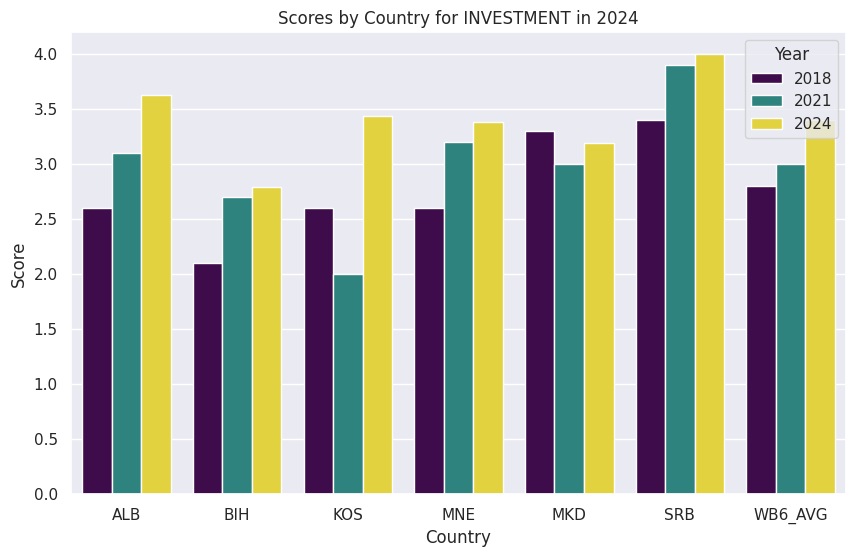

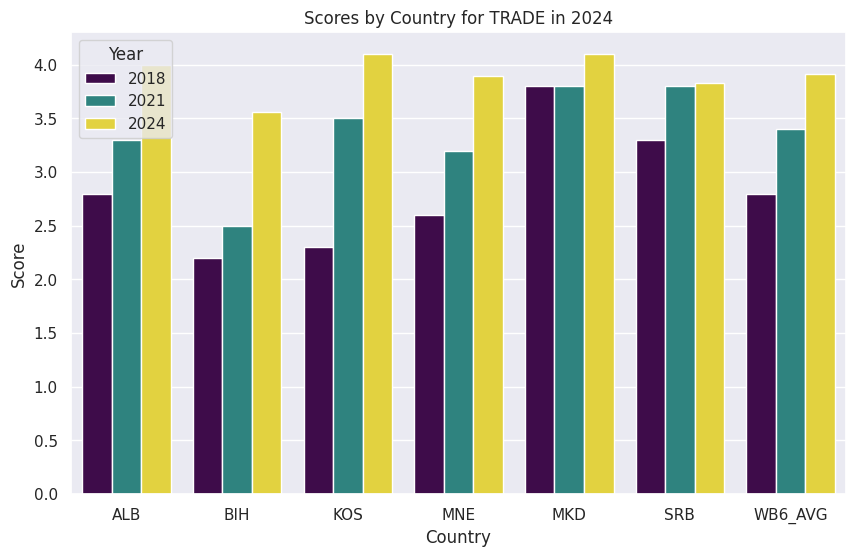

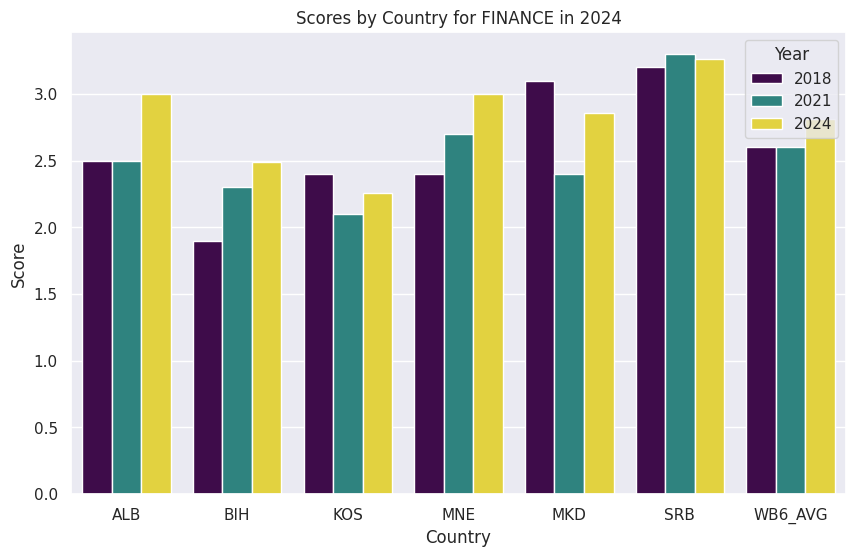

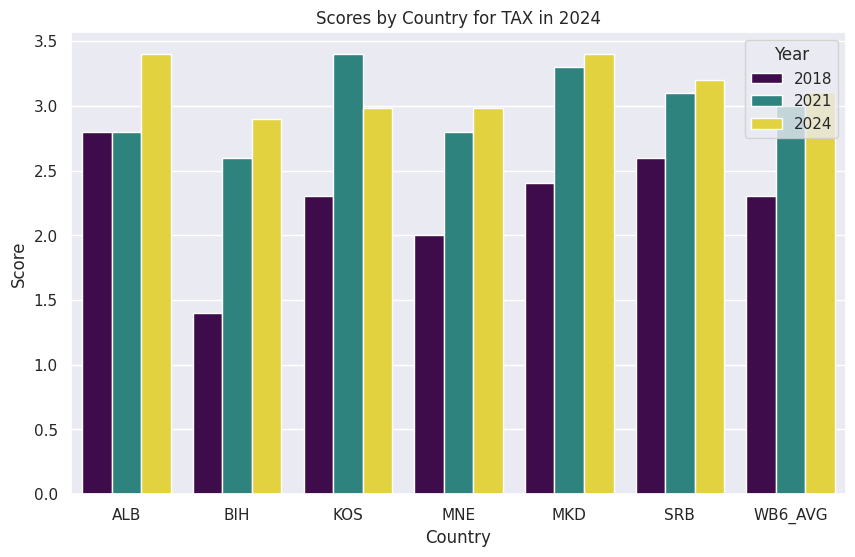

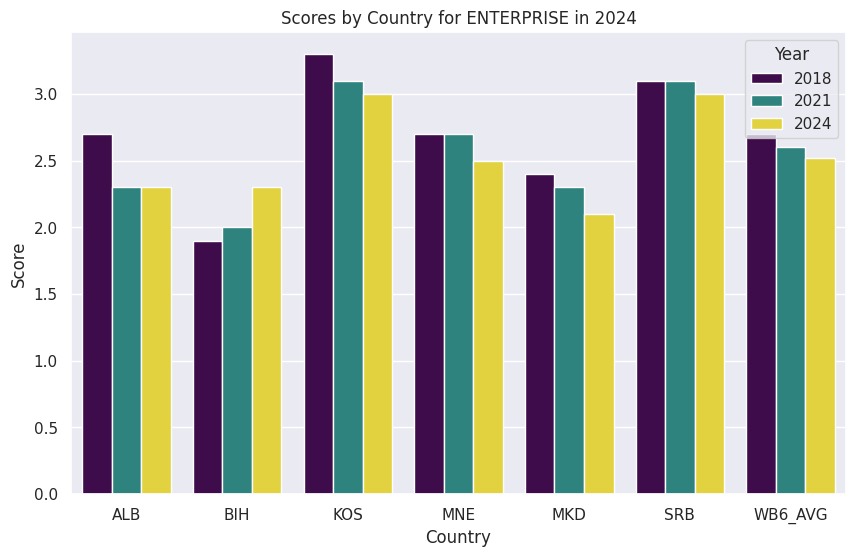

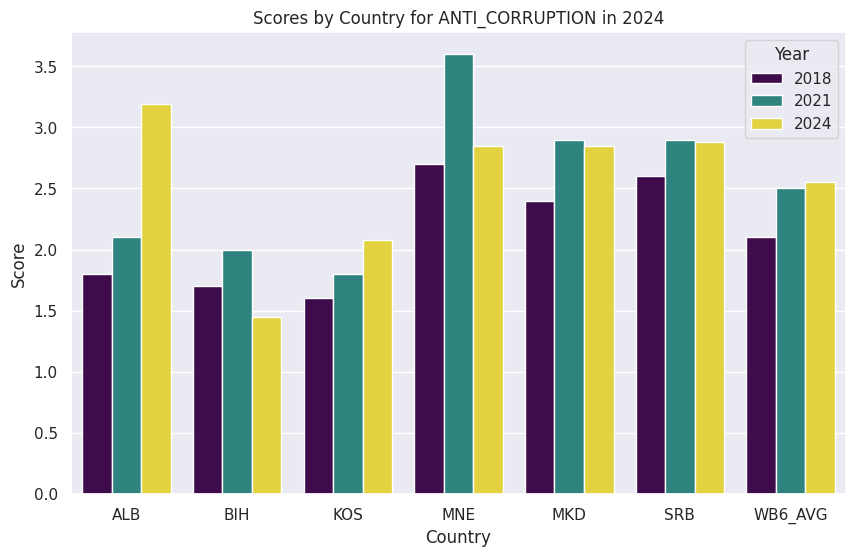

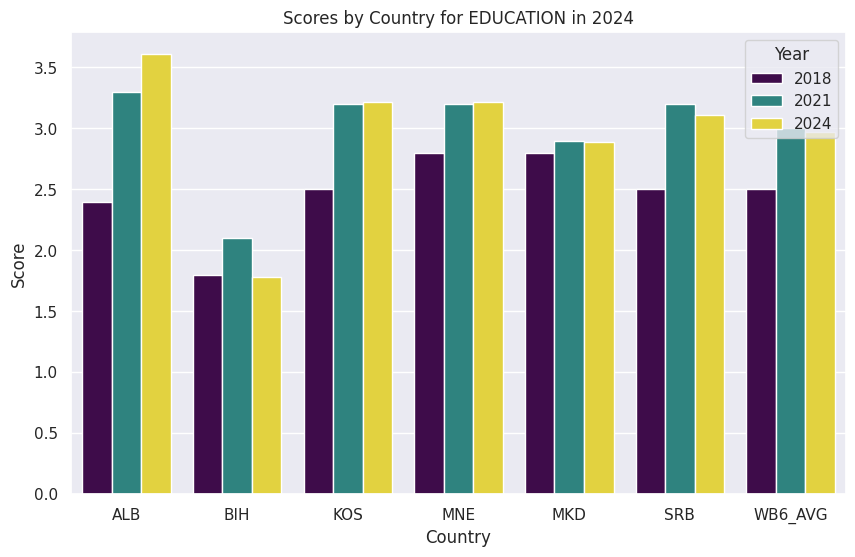

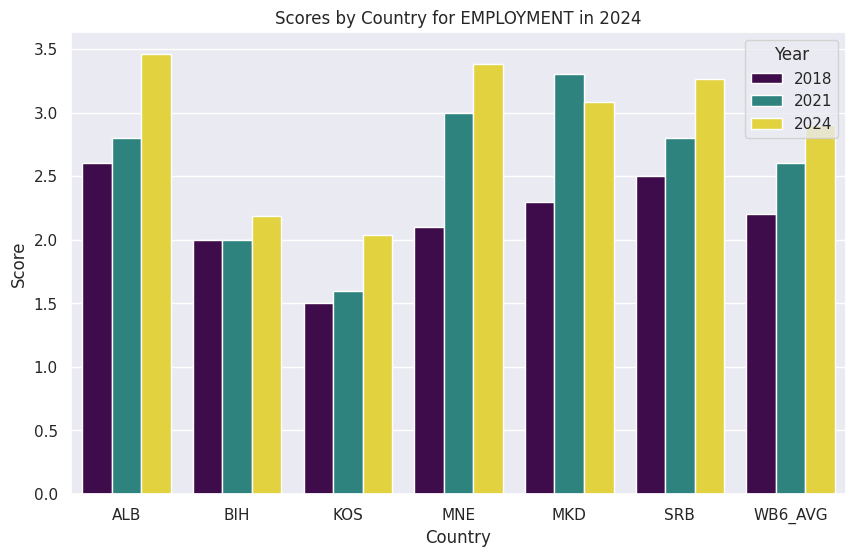

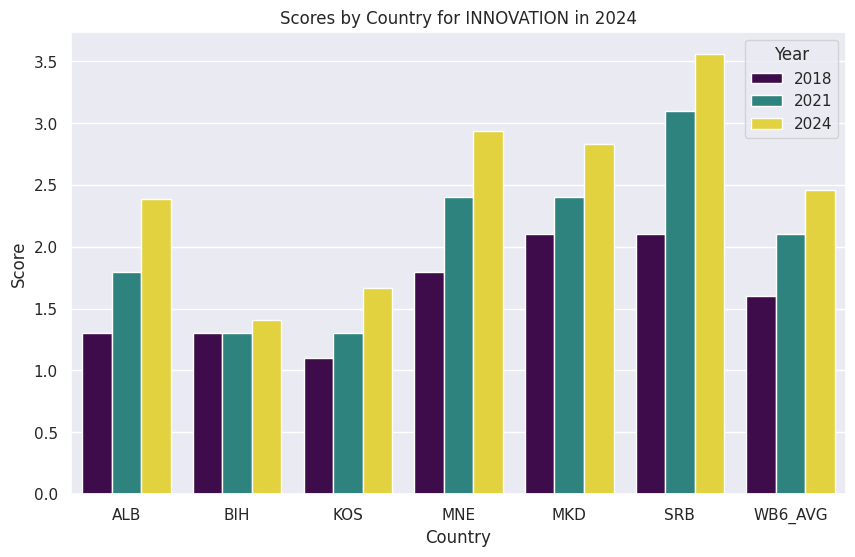

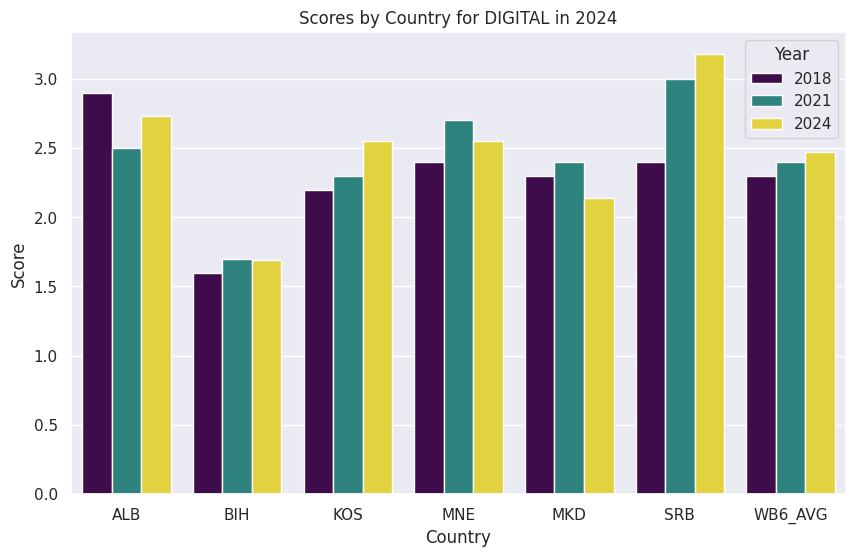

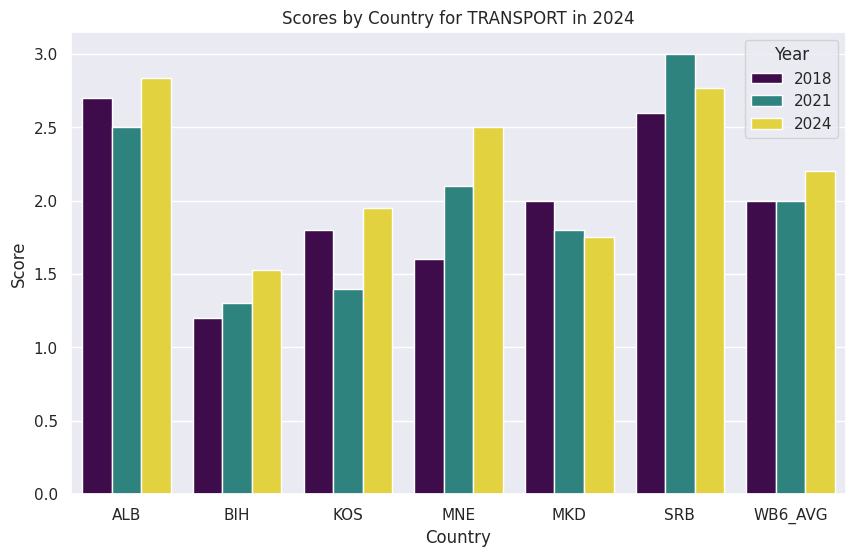

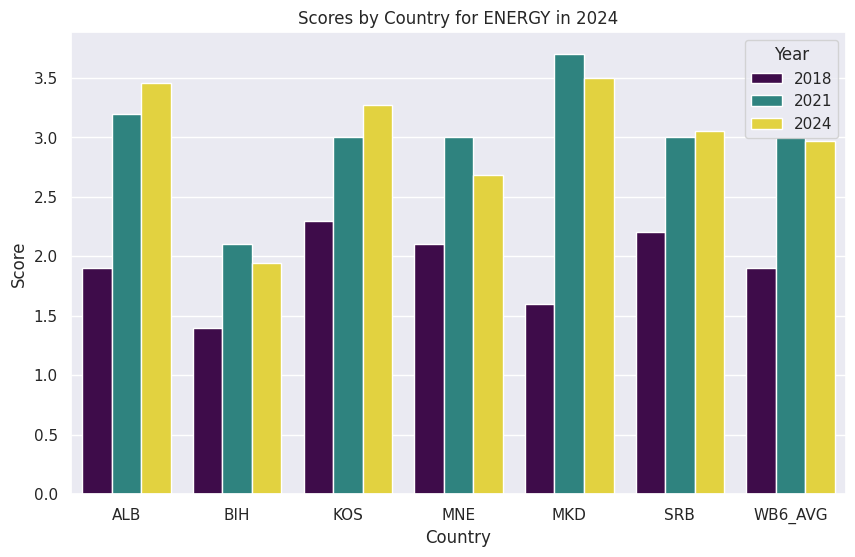

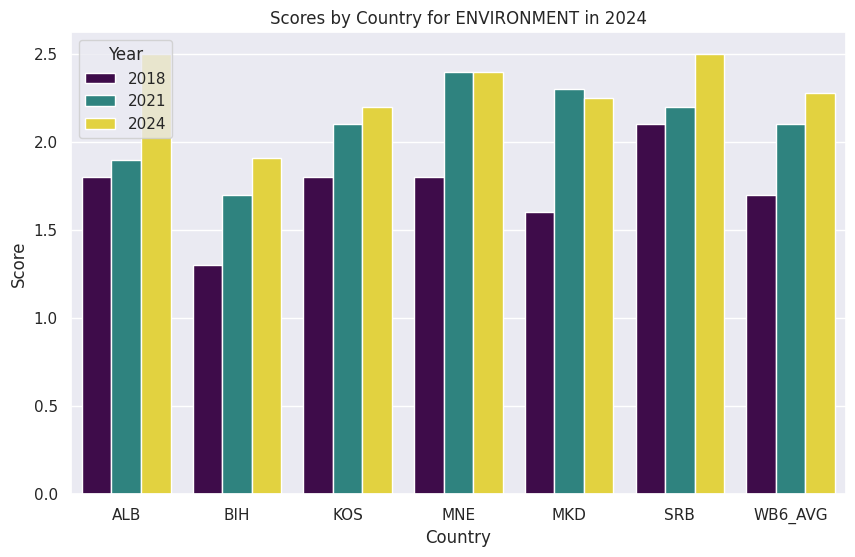

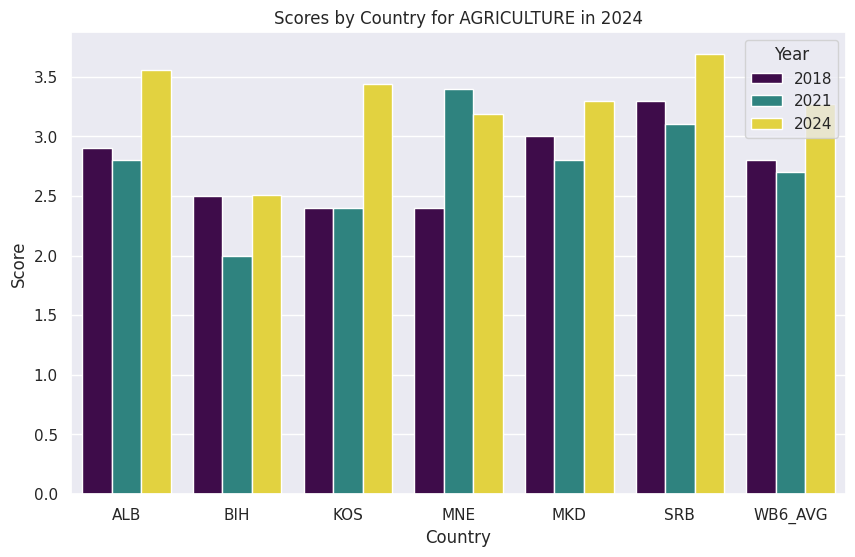

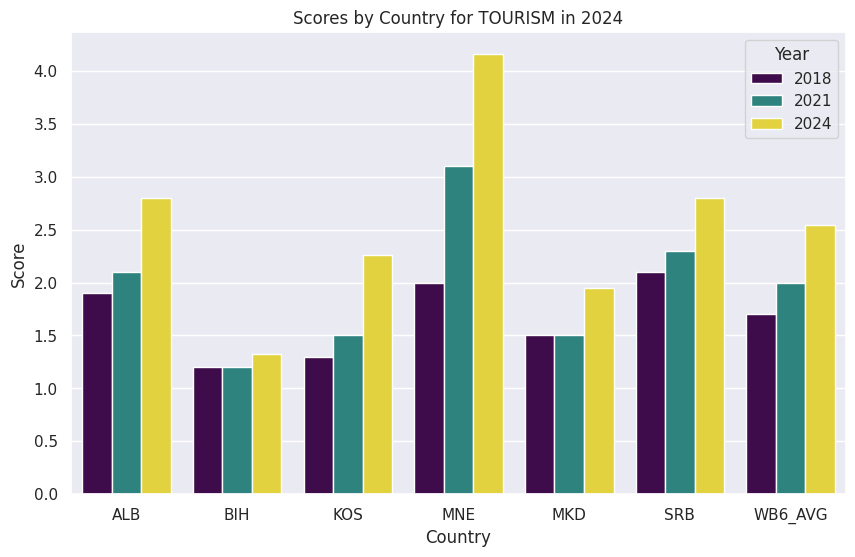

In [131]:
# Iterate over this array by using each key indiviually
for key in unique_keys:
    plt.figure(figsize=(10, 6))
    subset = df[df['key'] == key]
    sns.barplot(x='economy', y='score', hue='year', data=subset, palette='viridis')
    plt.title(f'Scores by Country for {key} in 2024')
    plt.xlabel('Country')
    plt.ylabel('Score')
    plt.legend(title='Year')
    plt.show()

This becomes hard to read, since all the graphs are plotted one after the other. With catplot you can plot all keys into a multi-faceted plot. By passing `col='key'` it automatically produces a plot for each key:

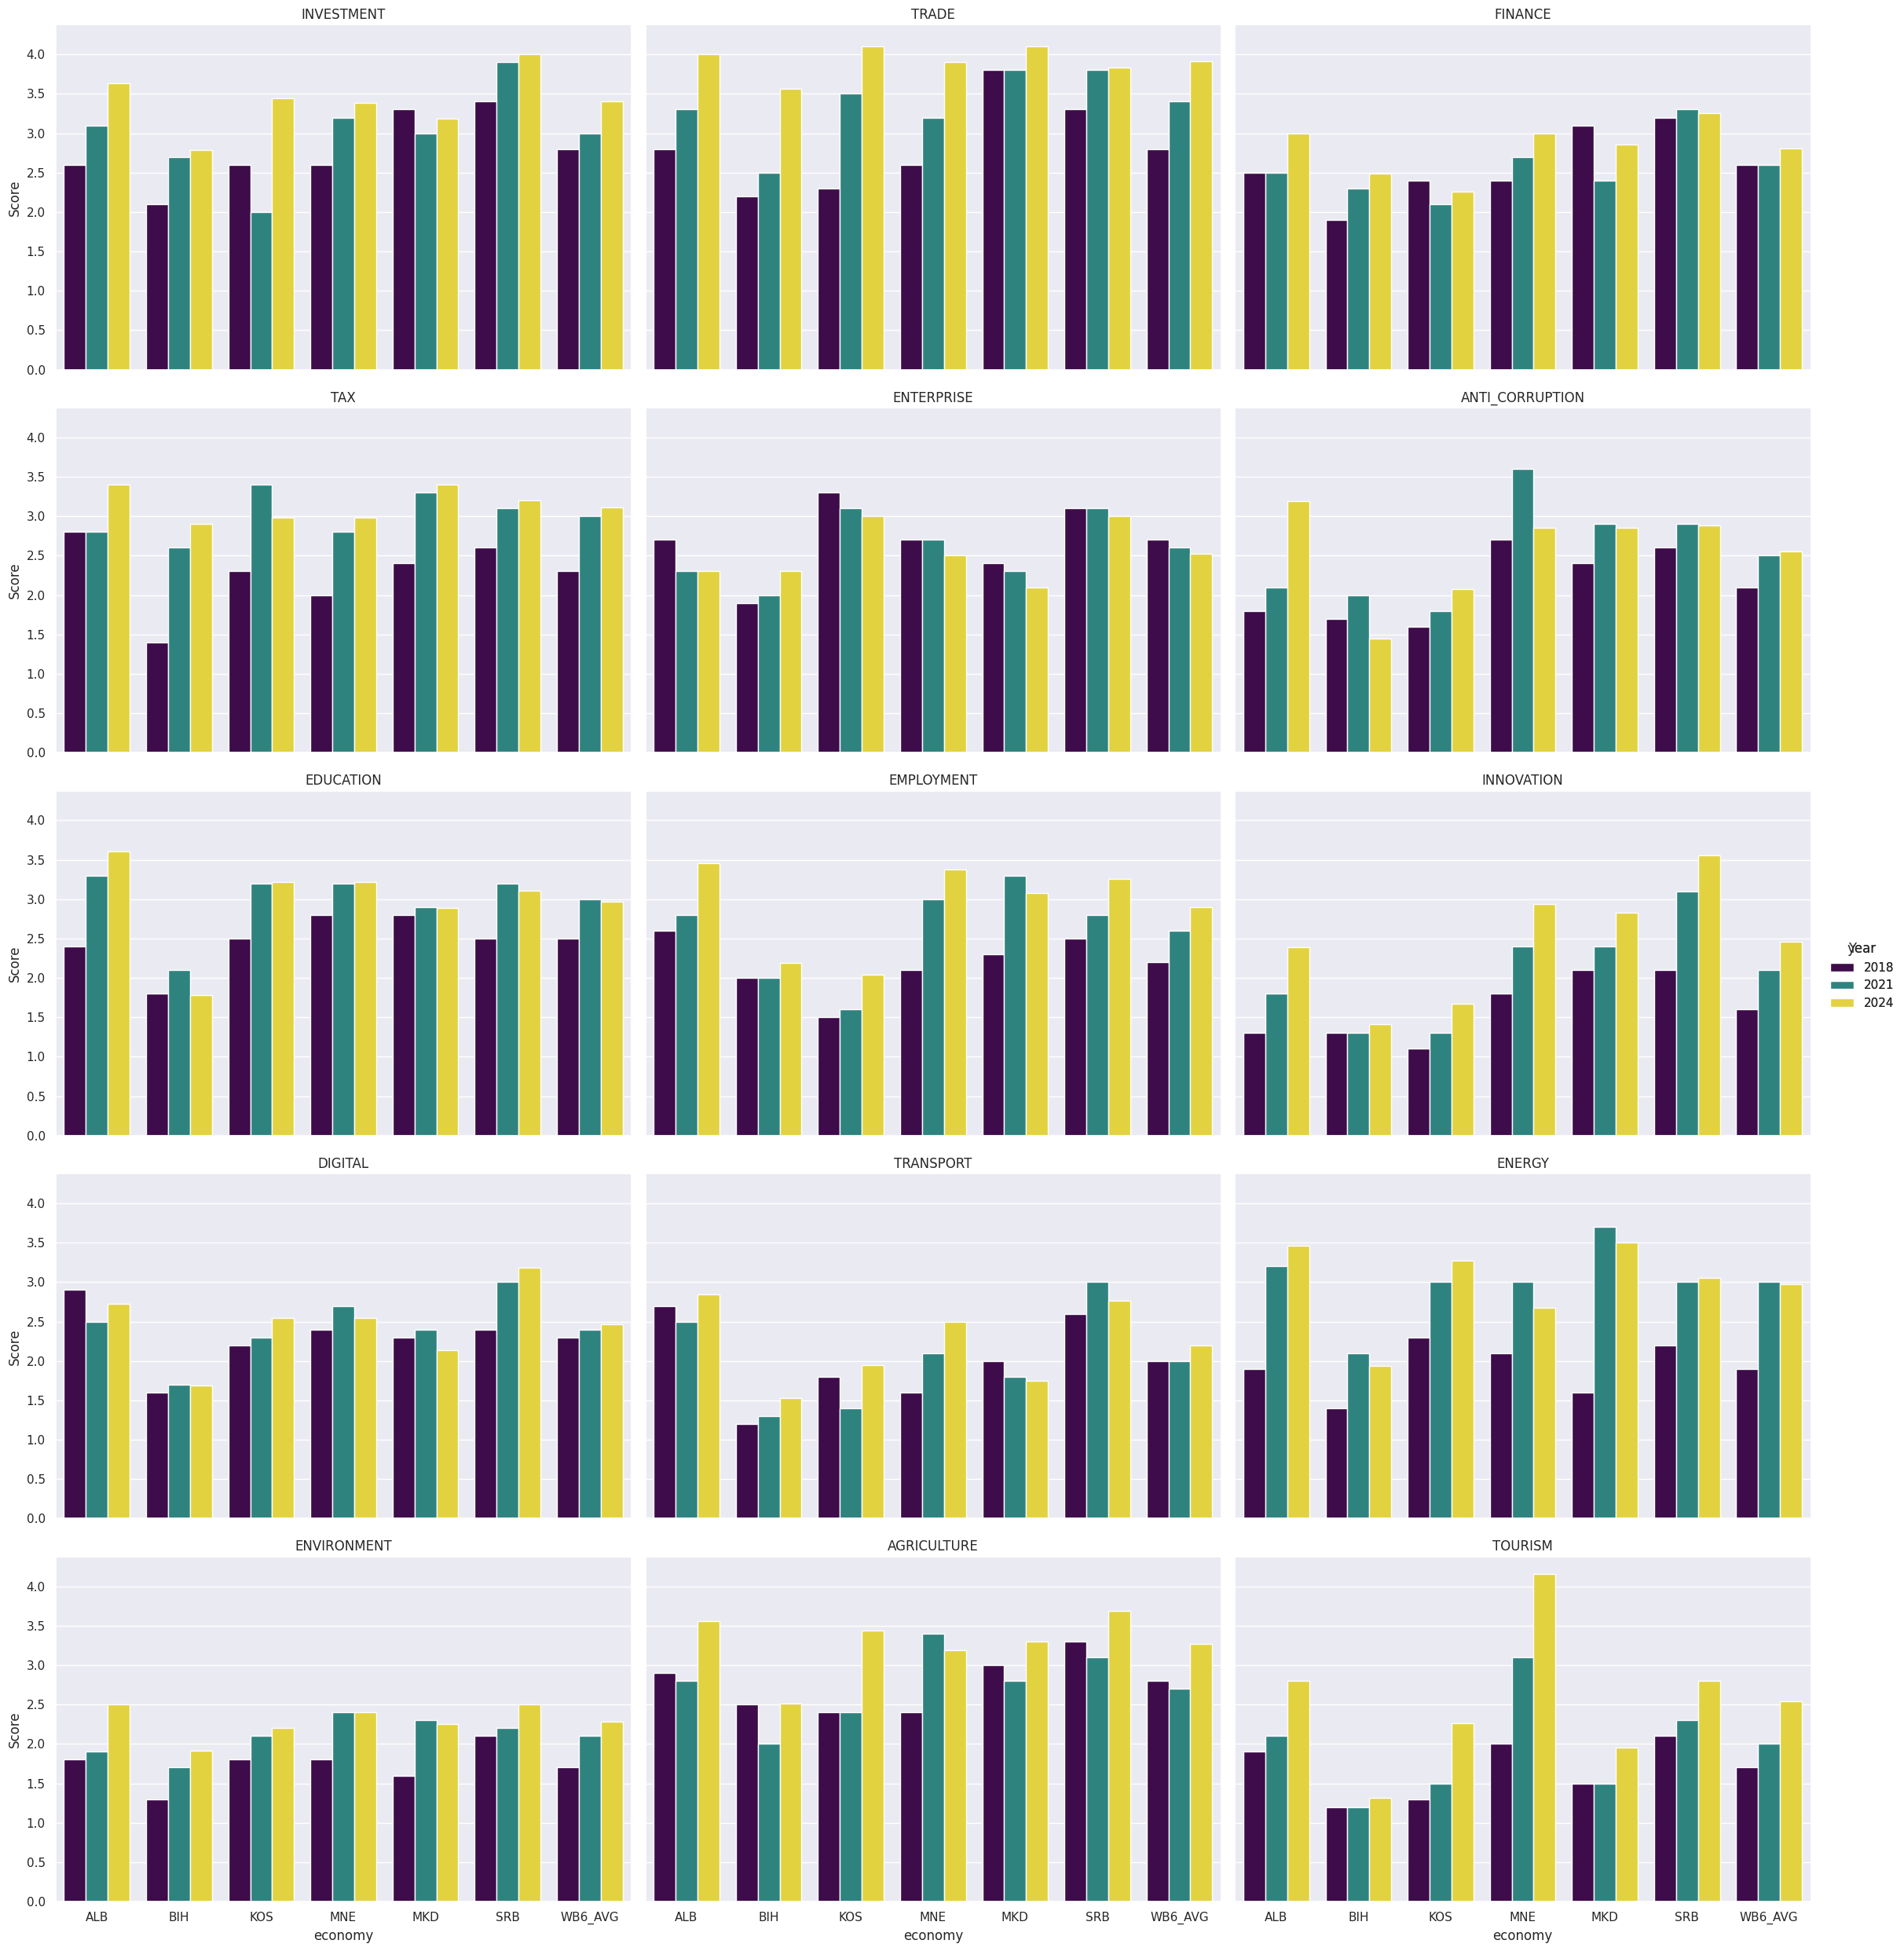

In [132]:
g = sns.catplot(
    x='economy',
    y='score',
    hue='year',
    col='key',
    data=df,
    kind='bar',
    col_wrap=3,  # Adjust based on how many plots you want per row
    height=5,
    aspect=1.5,
    palette='viridis'
)
g.set_titles("{col_name}")
g.set_axis_labels("economy", "Score")
g.add_legend(title='Year')
plt.show()

### plotly

Plotly's Python graphing library makes interactive, publication-quality graphs. See [examples](https://plotly.com/python/) here.

If not yet done, install plotly and import it:

In [ ]:
!pip install plotly

In [ ]:
import plotly.express as px

# Create a bar chart
fig = px.bar(df, x='economy', y='score', color='economy',facet_col='key',facet_row='year',title='test')

# Show the plot
fig.show()

In [ ]:
# Create a faceted line plot to visualise the trend of scores for each economy (country) over the years, separated by the 'key' column.
fig = px.line(df,
              x='year',
              y='score',
              color='economy',
              facet_col='key',
              markers=True,
              facet_col_wrap=5,
              title='Country Scores by Year, Separated by Key Category',
              labels={'economy': 'Country', 'score': 'Score', 'year': 'Year'})

# Show the plot
fig.show()

### Sub-dimensions

Let's look at the sub-dimension:

In [136]:
# Let's first load the subdimensions_labels.csv file to inspect its contents and see how we can merge it with the existing subdimensions_scores data.

# Load the subdimensions labels CSV
labels_df = pd.read_csv('/content/subdimensions_labels.csv')

# Display the first few rows of the labels DataFrame to inspect
labels_df.head()

subdimensions_df = pd.read_csv('/content/subdimensions_scores.csv')
subdimensions_df

,key,economy,year,score
0,INVESTMENT_S01,ALB,2024,4.3
1,INVESTMENT_S01,BIH,2024,3.6
2,INVESTMENT_S01,KOS,2024,3.8
3,INVESTMENT_S01,MNE,2024,3.7
4,INVESTMENT_S01,MKD,2024,3.7
...,...,...,...,...
345,TOURISM_S03,KOS,2024,1.5
346,TOURISM_S03,MNE,2024,4.2
347,TOURISM_S03,MKD,2024,1.4
348,TOURISM_S03,SRB,2024,2.3


In [137]:
subdimensions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   key      350 non-null    object 
 1   economy  350 non-null    object 
 2   year     350 non-null    int64  
 3   score    350 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.1+ KB


In [ ]:
labels_df

,key,label
0,INVESTMENT_S01,Investment policy framework
1,INVESTMENT_S02,Investment promotion and facilitation
2,INVESTMENT_S03,Mobilising sustainable investment
3,TRADE_S01,Trade policy framework
4,TRADE_S02,Digital trade
5,TRADE_S03,Export promotion
6,FINANCE_S01,Bank financing framework
7,FINANCE_S02,Access to alternative financing sources
8,FINANCE_S03,Digital finance
9,TAX_S01,Tax policy framework


In [138]:
# For better readability let's merge them
# Merge the subdimensions_scores and labels dataframes based on the 'key' column
merged_df = pd.merge(subdimensions_df, labels_df, on='key', how='left')

merged_df.head()

,key,economy,year,score,label
0,INVESTMENT_S01,ALB,2024,4.3,Investment policy framework
1,INVESTMENT_S01,BIH,2024,3.6,Investment policy framework
2,INVESTMENT_S01,KOS,2024,3.8,Investment policy framework
3,INVESTMENT_S01,MNE,2024,3.7,Investment policy framework
4,INVESTMENT_S01,MKD,2024,3.7,Investment policy framework


Create a heatmap with plotly

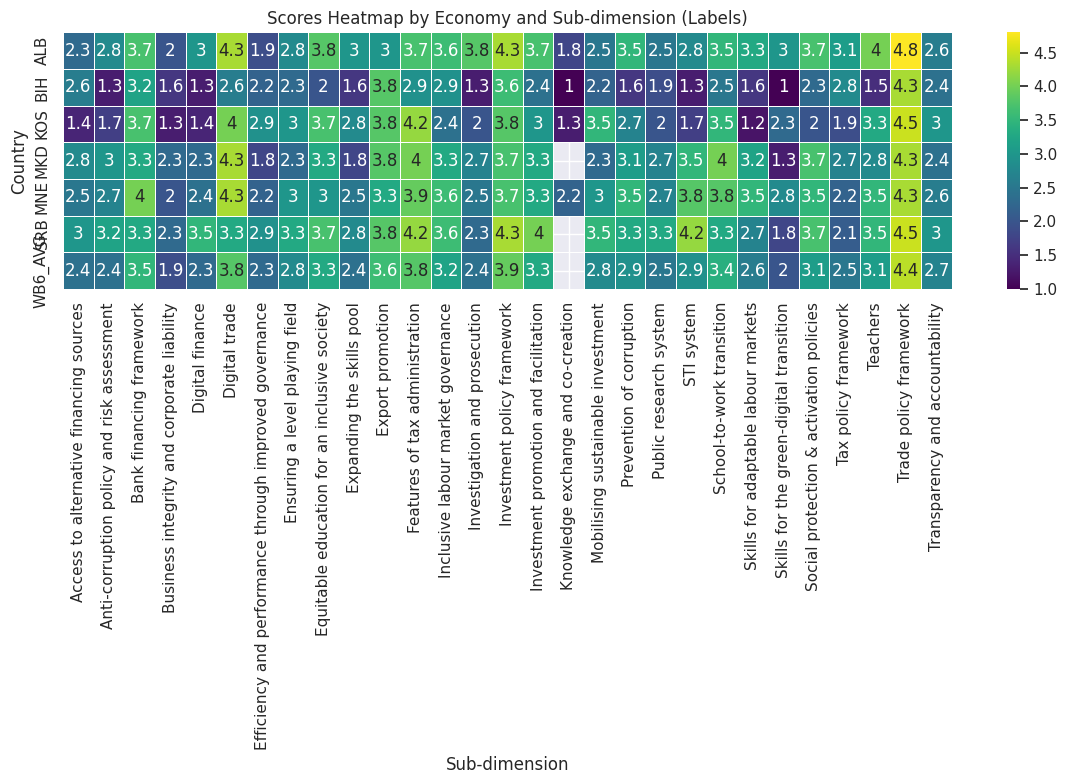

In [ ]:

# Create a pivot table for the heatmap using the 'label' column for the labels
heatmap_data_with_labels = merged_df.head(200).pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Plot the updated heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_with_labels, annot=True, cmap='viridis', linewidths=.5)
plt.title('Scores Heatmap by Economy and Sub-dimension')
plt.xlabel('Sub-dimension')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
merged_df

,key,economy,year,score,label
0,INVESTMENT_S01,ALB,2024,4.3,Investment policy framework
1,INVESTMENT_S01,BIH,2024,3.6,Investment policy framework
2,INVESTMENT_S01,KOS,2024,3.8,Investment policy framework
3,INVESTMENT_S01,MNE,2024,3.7,Investment policy framework
4,INVESTMENT_S01,MKD,2024,3.7,Investment policy framework
...,...,...,...,...,...
345,TOURISM_S03,KOS,2024,1.5,Sustainable and competitive tourism
346,TOURISM_S03,MNE,2024,4.2,Sustainable and competitive tourism
347,TOURISM_S03,MKD,2024,1.4,Sustainable and competitive tourism
348,TOURISM_S03,SRB,2024,2.3,Sustainable and competitive tourism


In [ ]:
# prompt: Using dataframe merged_df: filter for key that contains DIGITAL and 2024

# Filter for keys containing "DIGITAL"
filtered_df = merged_df[merged_df['key'].str.contains('DIGITAL')]

# Filter for the year 2024
filtered_df = filtered_df[filtered_df['year'] == 2024]


In [ ]:
# Check for any missing scores in the merged DataFrame
missing_scores = merged_df.isnull().sum()

# Check how many unique sub-dimension labels are present and how many are missing
unique_labels = merged_df['label'].nunique()
missing_scores, unique_labels, merged_df['label'].unique()

(key        0
 economy    0
 year       0
 score      0
 label      0
 dtype: int64,
 49,
 array(['Investment policy framework',
        'Investment promotion and facilitation',
        'Mobilising sustainable investment', 'Trade policy framework',
        'Digital trade', 'Export promotion', 'Bank financing framework',
        'Access to alternative financing sources', 'Digital finance',
        'Tax policy framework', 'Features of tax administration',
        'Efficiency and performance through improved governance',
        'Transparency and accountability',
        'Ensuring a level playing field',
        'Anti-corruption policy and risk assessment',
        'Prevention of corruption',
        'Business integrity and corporate liability',
        'Investigation and prosecution',
        'Equitable education for an inclusive society', 'Teachers',
        'School-to-work transition',
        'Skills for the green-digital transition',
        'Inclusive labour market governance',
    

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# Create the pivot table for the heatmap using the 'label' column for the labels
heatmap_data_with_labels = merged_df.pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Create the heatmap
fig = go.Figure(data=go.Heatmap(
                   z=heatmap_data_with_labels.values,
                   x=heatmap_data_with_labels.columns,
                   y=heatmap_data_with_labels.index,
                   #colorscale='Viridis',
                   hoverongaps=False,  # Show hover info even on gaps
                   showscale=True))  # Show color scale bar

# Set title and axis labels
fig.update_layout(
    title='Interactive Heatmap: Country Scores by Sub-dimension',
    #xaxis_nticks=50,
    xaxis_title='Sub-dimension',
    yaxis_title='Country',
)

# Show the interactive plot
fig.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for a specific sub-dimension (e.g., DIGITAL)
subdimension_key = 'DIGITAL'
filtered_df = merged_df[merged_df['key'].str.startswith(subdimension_key)]

# Example: We'll aggregate the scores for one year (you can change this as needed)
year_of_interest = 2024
filtered_year_df = filtered_df[filtered_df['year'] == year_of_interest]

# Pivot the data to have economies as rows and subdimension categories as columns
pivot_data = filtered_year_df.pivot_table(index='economy', columns='key', values='score', aggfunc='mean')

# Select one country for demonstration (e.g., the first country)
example_country = pivot_data.index[0]
scores = pivot_data.loc[example_country]

scores

,ALB
key,
DIGITAL_S01,3.2
DIGITAL_S02,2.5
DIGITAL_S03,2.3
DIGITAL_S04,2.8


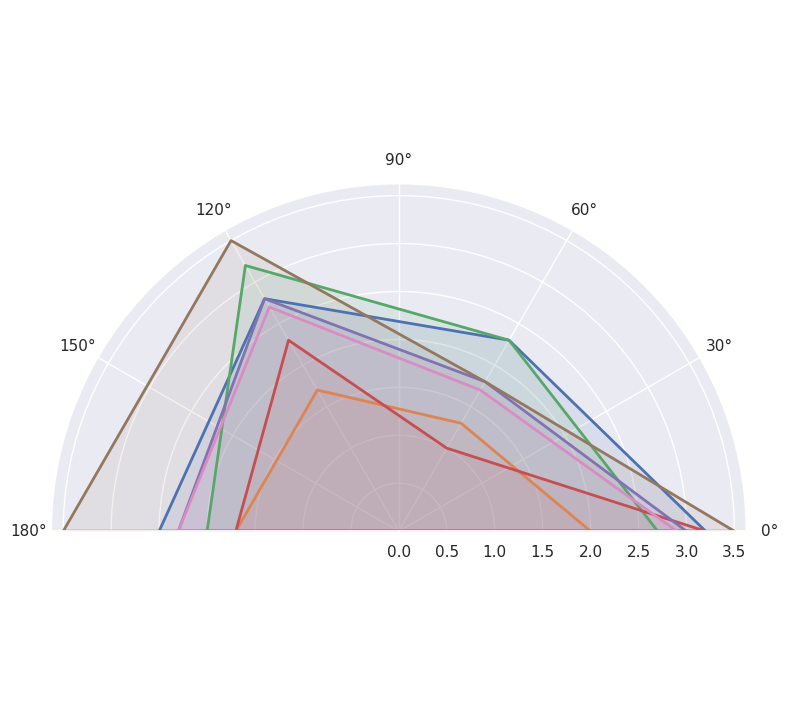

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Filter the data for a specific sub-dimension (e.g., DIGITAL)
subdimension_key = 'DIGITAL'
filtered_df = merged_df[merged_df['key'].str.startswith(subdimension_key)]

# Example: We'll aggregate the scores for one year (you can change this as needed)
year_of_interest = 2024
filtered_year_df = filtered_df[filtered_df['year'] == year_of_interest]

# Pivot the data to have economies as rows and subdimension categories as columns
pivot_data = filtered_year_df.pivot_table(index='economy', columns='label', values='score', aggfunc='mean')

# Prepare the radar chart
categories = pivot_data.columns
N = len(categories)

# Compute the angle for each category
angles = np.linspace(0, np.pi, N, endpoint=True).tolist()
# Complete the loop for radar by repeating the first category
angles += angles[:1]
#print(filtered_year_df)
#print(pivot_data)
# Set up the radar chart in polar coordinates
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Plot data for each country
for i, country in enumerate(pivot_data.index):
    scores = pivot_data.loc[country].values
    scores = np.concatenate((scores, [scores[0]]))  # Close the loop for the radar chart

    ax.fill(angles, scores, alpha=0.1)  # Fill the area
    ax.plot(angles, scores, linewidth=2, label=country)  # Plot the outline for each country

# Set the category labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=10)

# Set the title
ax.set_title(f'Radar Chart for {subdimension_key} Sub-dimensions ({year_of_interest})')

# Add legend
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
ax.set_thetamax(180)
# Show the chart
plt.tight_layout()
plt.show()


In [ ]:
merged_df

,key,economy,year,score,label
0,INVESTMENT_S01,ALB,2024,4.3,Investment policy framework
1,INVESTMENT_S01,BIH,2024,3.6,Investment policy framework
2,INVESTMENT_S01,KOS,2024,3.8,Investment policy framework
3,INVESTMENT_S01,MNE,2024,3.7,Investment policy framework
4,INVESTMENT_S01,MKD,2024,3.7,Investment policy framework
...,...,...,...,...,...
345,TOURISM_S03,KOS,2024,1.5,Sustainable and competitive tourism
346,TOURISM_S03,MNE,2024,4.2,Sustainable and competitive tourism
347,TOURISM_S03,MKD,2024,1.4,Sustainable and competitive tourism
348,TOURISM_S03,SRB,2024,2.3,Sustainable and competitive tourism


# Troubleshooting

- Do you see this error? `NameError: name 'pd' is not defined` - Make sure you imported pandas

In [ ]:
import pandas as pd

# Additional Resources



*   [Matplotlib Gallery](https://matplotlib.org/stable/gallery/index.html): Explore a wide range of plots and their code examples.
*   [Matplotlib Tutorials](https://matplotlib.org/stable/tutorials/index.html): Step-by-step tutorials on various aspects of matplotlib.
*   Pandas Visualization: Pandas also provides convenient plotting functions that integrate with matplotlib.





